In [1]:
import pandas as pd
import numpy as np

In [32]:
x=pd.read_csv("IMDB_Reviews.csv")

In [33]:
x.head(n=10)

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
5,"Probably my all-time favorite movie, a story o..."
6,I sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i..."
8,Encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...


In [34]:
x.values

array([["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due t

In [35]:
x_clean = pd.read_csv("IMDB_Cleaned_Reviews.csv").iloc[:500].values

In [36]:
y=pd.read_csv("IMDB_Dataset.csv").iloc[:500,-1]
y.values

array(['positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negati

In [37]:
x_clean.shape


(500, 1)

In [38]:
y.shape

(500,)

In [39]:
split=int(0.8*x_clean.shape[0])

In [40]:
split

400

In [41]:
X_Train = x_clean[:split,:]
Y_Train = y[:split]
X_Test = x_clean[split:,:]
Y_Test = y[split:]

In [42]:
print(X_Train.shape,Y_Train.shape)

(400, 1) (400,)


In [43]:
print(X_Test.shape,Y_Test.shape)

(100, 1) (100,)


In [44]:
print(X_Train)

[['one review mention watch 1 oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side']
 [

In [75]:
X_Train = X_Train.reshape((-1,))
X_Test = X_Test.reshape((-1,))

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
cv = CountVectorizer(ngram_range=(1,3))
x_vec = cv.fit_transform(X_Train).toarray()
print(x_vec)
print(x_vec.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(400, 98775)


In [78]:
print(cv.get_feature_names())

['00', '00 sound', '00 sound interest', '00 stay', '00 stay watch', '000', '000 dollar', '000 dollar miss', '000 id', '000 id damn', '000 mile', '000 mile round', '000 reason', '000 reason harm', '000 though', '000 though look', '00am', '00am see', '08', '08 check', '08 check saw', '10', '10 000', '10 000 dollar', '10 10', '10 10 excel', '10 10 film', '10 10 peopl', '10 10 sound', '10 10 uncl', '10 15', '10 15 minut', '10 20000', '10 20000 nl', '10 30', '10 30 pm', '10 act', '10 act 10', '10 atmospher', '10 atmospher 10', '10 averag', '10 averag rate', '10 averag work', '10 aw', '10 aw movi', '10 decemb', '10 decemb 2005', '10 excel', '10 excel movi', '10 film', '10 film seen', '10 grade', '10 greek', '10 greek movi', '10 horribl', '10 horribl film', '10 improv', '10 improv 10', '10 limp', '10 limp killer', '10 line', '10 line would', '10 lot', '10 lot gore', '10 mean', '10 mean pretti', '10 mean stupid', '10 minut', '10 minut sadli', '10 minut sorri', '10 minut though', '10 minut unbe

In [79]:
## Vectorization on the test set
xt_vec = cv.transform(X_Test).toarray()
print(xt_vec)
cv.get_feature_names()
print(xt_vec.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(100, 98775)


In [80]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB, GaussianNB

In [81]:
mnb = MultinomialNB()
print(mnb)

MultinomialNB()


In [82]:
mnb.fit(x_vec,Y_Train)

MultinomialNB()

In [83]:
mnb.predict(xt_vec)

array(['negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'positive',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negati

In [84]:
mnb.predict_proba(xt_vec)

array([[9.98394356e-01, 1.60564433e-03],
       [9.99928326e-01, 7.16736895e-05],
       [9.99998016e-01, 1.98436656e-06],
       [1.19820791e-08, 9.99999988e-01],
       [9.99991441e-01, 8.55931308e-06],
       [8.80729027e-01, 1.19270973e-01],
       [9.99850867e-01, 1.49132611e-04],
       [8.54342835e-08, 9.99999915e-01],
       [1.00000000e+00, 6.33618768e-11],
       [6.69346965e-04, 9.99330653e-01],
       [1.04922168e-26, 1.00000000e+00],
       [9.99793596e-01, 2.06403622e-04],
       [9.81821144e-01, 1.81788556e-02],
       [9.85496536e-01, 1.45034638e-02],
       [9.99574221e-01, 4.25778707e-04],
       [9.99998082e-01, 1.91773790e-06],
       [1.00000000e+00, 4.67122522e-11],
       [9.99999394e-01, 6.05667810e-07],
       [1.00000000e+00, 1.01305119e-16],
       [9.99999998e-01, 1.83586007e-09],
       [1.00000000e+00, 7.16754014e-20],
       [9.98927636e-01, 1.07236381e-03],
       [1.00000000e+00, 6.88311992e-13],
       [4.34932597e-15, 1.00000000e+00],
       [1.443941

In [85]:
mnb.score(xt_vec,Y_Test)

0.73

In [88]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
ypred = mnb.predict(xt_vec)
cnf_matrix = confusion_matrix(Y_Test,ypred)

In [91]:
cnf_matrix

array([[45,  8],
       [19, 28]], dtype=int64)

Confusion matrix, without normalization
[[45  8]
 [19 28]]


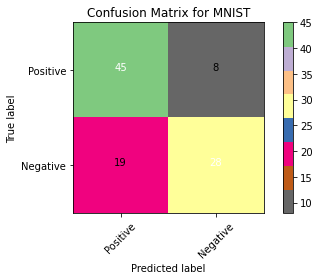

In [93]:
plot_confusion_matrix(cnf_matrix,classes=["Positive","Negative"],normalize=False,title="Confusion Matrix for MNIST",cmap=plt.cm.Accent_r)

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(Y_Test,ypred))

              precision    recall  f1-score   support

    negative       0.70      0.85      0.77        53
    positive       0.78      0.60      0.67        47

    accuracy                           0.73       100
   macro avg       0.74      0.72      0.72       100
weighted avg       0.74      0.73      0.72       100

